In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import load_diabetes,load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [100]:
data = load_iris()
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [101]:
# Apply standard normalization on the input data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)
print(X_scaled.shape)

(150, 4)


(150, 3)


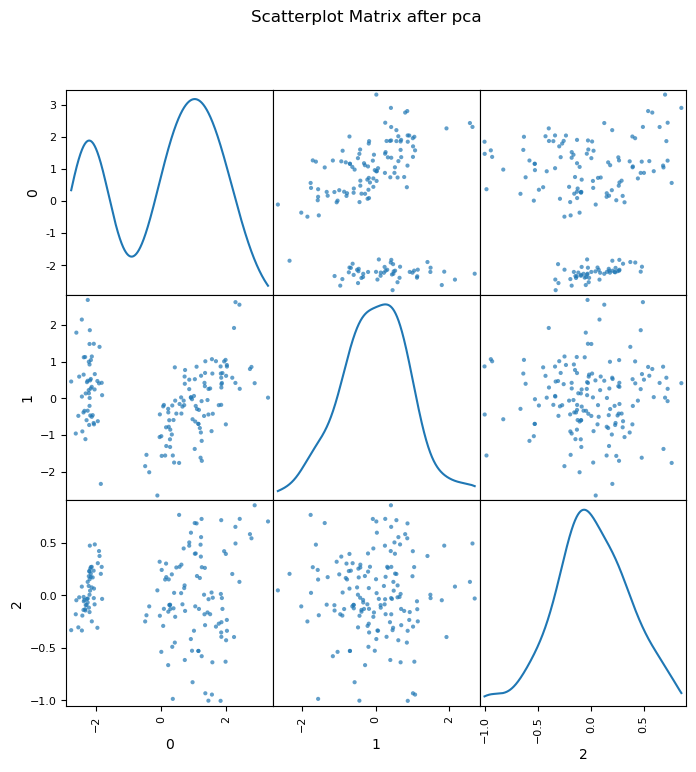

In [102]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)  # Reduce to 3 components
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)

# Plot the scatter plot of the data
pd.plotting.scatter_matrix(pd.DataFrame(X_pca), figsize=(8, 8), diagonal='kde', alpha=0.7)
plt.suptitle("Scatterplot Matrix after pca")
plt.show()

In [103]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [104]:
# Train an SVM classifier without PCA
svm = SVC(kernel='rbf')  # You can change the kernel if needed
svm.fit(X_train, y_train.values.ravel())

# Make predictions and evaluate performance
y_pred = svm.predict(X_test)
accuracy_no_pca = accuracy_score(y_test, y_pred)
print(f"Accuracy without PCA: {accuracy_no_pca}")


Accuracy without PCA: 1.0


In [105]:
# Train an SVM classifier with PCA
svm.fit(X_train_pca, y_train.values.ravel())

# Make predictions and evaluate performance
y_pred_pca = svm.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA: {accuracy_with_pca}")


Accuracy with PCA: 1.0


In [106]:
print(f"Accuracy without PCA: {accuracy_no_pca}")
cm_no_pca = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix Without PCA:")
print(cm_no_pca)
print(f"Accuracy with PCA: {accuracy_with_pca}")
cm_with_pca = confusion_matrix(y_test, y_pred_pca)
print("\nConfusion Matrix With PCA:")
print(cm_with_pca)

Accuracy without PCA: 1.0

Confusion Matrix Without PCA:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy with PCA: 1.0

Confusion Matrix With PCA:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


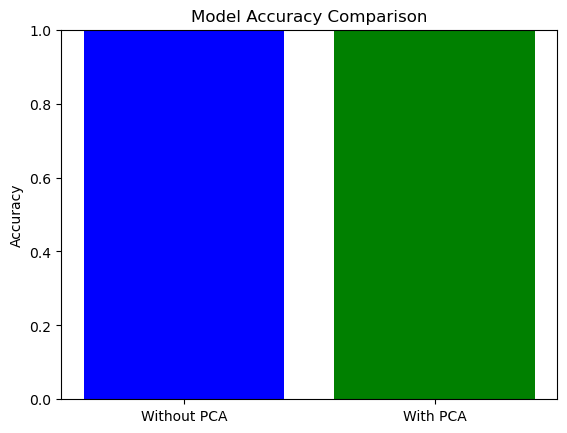

In [107]:
accuracies = [accuracy_no_pca, accuracy_with_pca]
labels = ['Without PCA', 'With PCA']

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

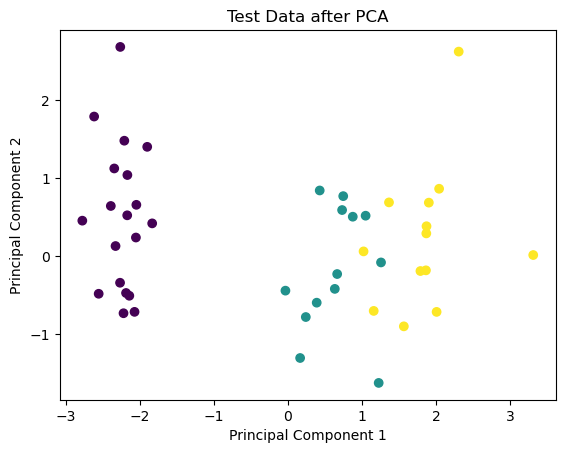

In [108]:
# Plot the data after PCA (2D projection)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.title("Test Data after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()